In [1]:
# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

'''
Kernel PCA
'''

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
dataset= pd.read_csv("../../data/Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:

# features
X=dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [18]:
y[1:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [19]:
#test train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

C:\Users\sourav.raj.IN\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
# Applying kernel PCA
from sklearn.decomposition import KernelPCA
# firt do this to know pca = PCA(n_components = None)
kpca = KernelPCA(n_components = 2, kernel = 'rbf' )
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

In [22]:
#fit Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
#predicting the test set results
y_pred = classifier.predict(x_test)

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [25]:
cm

array([[64,  4],
       [ 6, 26]], dtype=int64)

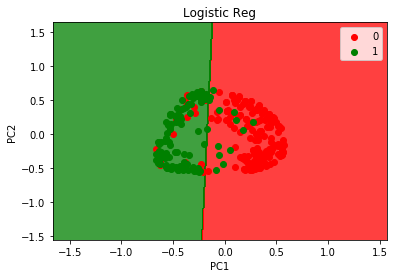

In [26]:
#visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i), label=j)
plt.title('Logistic Reg')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

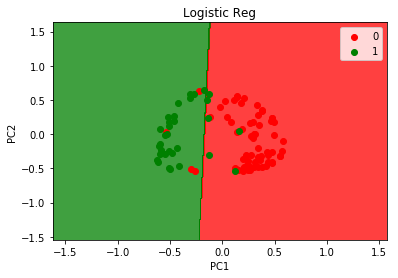

In [28]:
#visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i), label=j)
plt.title('Logistic Reg')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()